# ML Assignment 1

#### By Leila Khaertdinova

## Task 1

### Linear Regression
#### Data reading & plotting

In [ ]:
import pandas as pd

# loading the dataset
df = pd.read_csv('task1_data.csv')
df.head()

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108


In [ ]:
# splitting the dataset into training and test sets
X_train, y_train, X_test, y_test = df['X_train'], df['y_train'], df['X_test'], df['y_test']

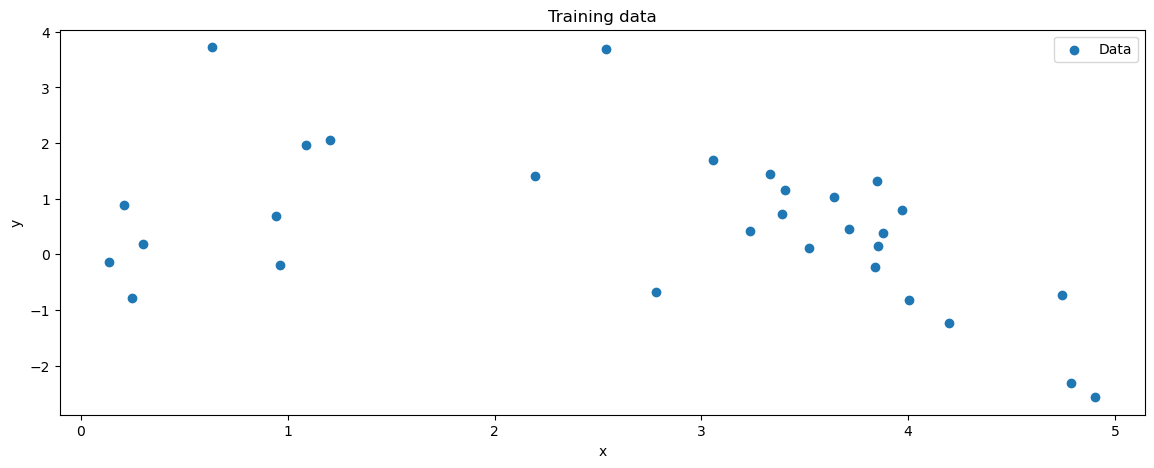

In [ ]:
import matplotlib.pyplot as plt

# plotting X_train against y_train 
plt.figure(figsize=(14, 5))

plt.scatter(X_train, y_train, label='Data')

plt.title('Training data')
plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')
plt.show()

#### Linear regression model fitting

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# building and fitting the linear regression model on train dataset
regressor = LinearRegression()
regressor.fit(np.array(X_train).reshape(-1, 1), y_train)

LinearRegression()

#### Linear regression model prediction & Evaluation


In [ ]:
# the linear regression model prediction on X_test
y_pred_lr = regressor.predict(np.array(X_test).reshape(-1, 1))

In [ ]:
from sklearn import metrics

# calculate and print metrics
def print_metrics(y_actual, y_pred):
    print('MSE:', metrics.mean_squared_error(y_actual, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print('MAE:',metrics.mean_absolute_error(y_actual, y_pred))
    print('R2:', metrics.r2_score(y_actual, y_pred))

In [ ]:
# evaluating the performance of the linear regression model on test dataset
print_metrics(y_test, y_pred_lr)

MSE: 0.78105677092199
RMSE: 0.8837741628504365
MAE: 0.783761030241441
R2: 0.2609450135378707


#### Plotting original data and prediction


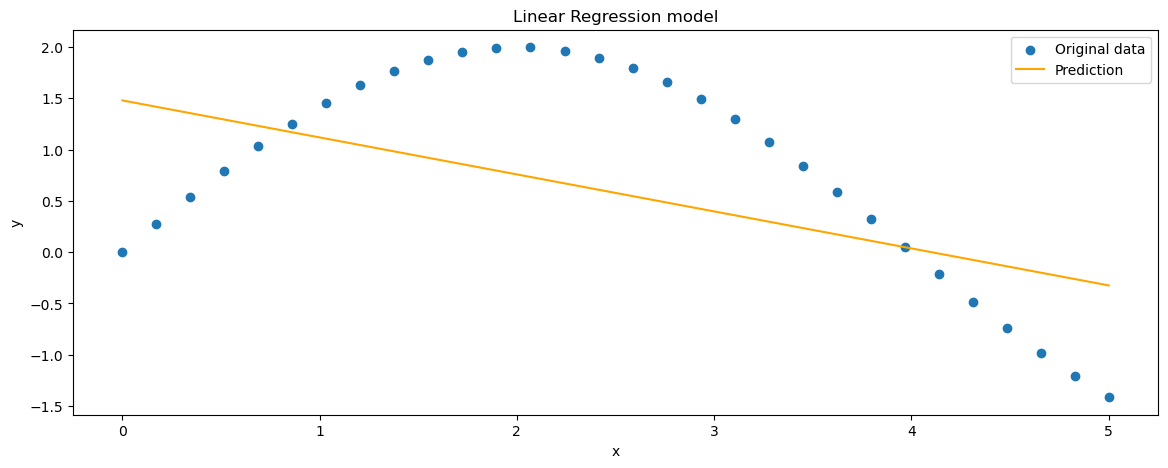

In [ ]:
import matplotlib.pyplot as plt

# plotting the results of the linear regression model
plt.figure(figsize=(14, 5))

plt.title('Linear Regression model') 

plt.scatter(X_test, y_test, label='Original data')
plt.plot(X_test, y_pred_lr, color='orange', label='Prediction')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')
plt.show()

According to the obtained value of R² that is far from 1, the linear regression model provides a poor fit to the target metrics. Furthermore, as can be seen from the line plot (provided above), the relationship between target variable and independent variables follows a non-linear pattern, whereas linear regression can only fit a line. Therefore, linear regression is not the optimum model for this task. 


As a result, linear regression should be expanded to a more complex model. So, let us apply polynomial regression.




### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# costructing a pipeline consisting of polynomial features (transforms) and the linear regression model (estimator)
features = PolynomialFeatures()
linear_regression = LinearRegression()
pipeline = Pipeline(steps=[('features', features), ('model', linear_regression)])

pipeline.fit(np.array(X_train).reshape(-1, 1), y_train)

Pipeline(steps=[('features', PolynomialFeatures()),
                ('model', LinearRegression())])

#### Tuning the degree hyper-parameter using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# finding the best degree for the polynomial regression model
degrees = np.arange(2, 10)
parameters = {'features__degree': degrees}

search = GridSearchCV(estimator=pipeline, param_grid=parameters, 
                      scoring='neg_mean_squared_error', cv=8)

search.fit(np.array(X_train).reshape(-1, 1), y_train)

y_pred_pr = search.predict(np.array(X_test).reshape(-1, 1))

print('The best degree for Polynomial Regression (CV score=%0.3f):' % 
      search.best_score_, search.best_params_['features__degree'] )

The best degree for Polynomial Regression (CV score=-1.078): 2


In [ ]:
# evaluating the performance of the polynomial regression model on test dataset
print_metrics(y_test, y_pred_pr)

MSE: 0.08205877217937993
RMSE: 0.2864590235607528
MAE: 0.15213273421671727
R2: 0.9223539862658873


#### Manually finding the best degree

In [ ]:
candidates = []

# manually looping through a list of degrees
for i in range(len(degrees)):
    # constructing a pipeline for the corresponding degree
    features = PolynomialFeatures(degree=degrees[i])
    pipeline = Pipeline(steps=[('features', features),
                         ('model', linear_regression)])
    # fitting the model on polynomial features of the corresponding degree
    pipeline.fit(np.array(X_train)[:, np.newaxis], y_train)

    # evaluating each pipeline by cross-validation and negative MSE metric
    scores = cross_val_score(estimator=pipeline, X=np.array(X_train)[:, np.newaxis], 
                             y=y_train, scoring='neg_mean_squared_error', cv=8)
    
    candidates.append([degrees[i], scores.mean()])

# finding the best degree with the highest metric
best_degree, best_score = max(candidates, key=lambda x: x[1])
print('The best degree for Polynomial Regression (CV score=%0.3f):' % best_score, best_degree)

The best degree for Polynomial Regression (CV score=-1.078): 2




We got the same result as Grid Search.



#### Plotting the test data and the best degree polynomial model

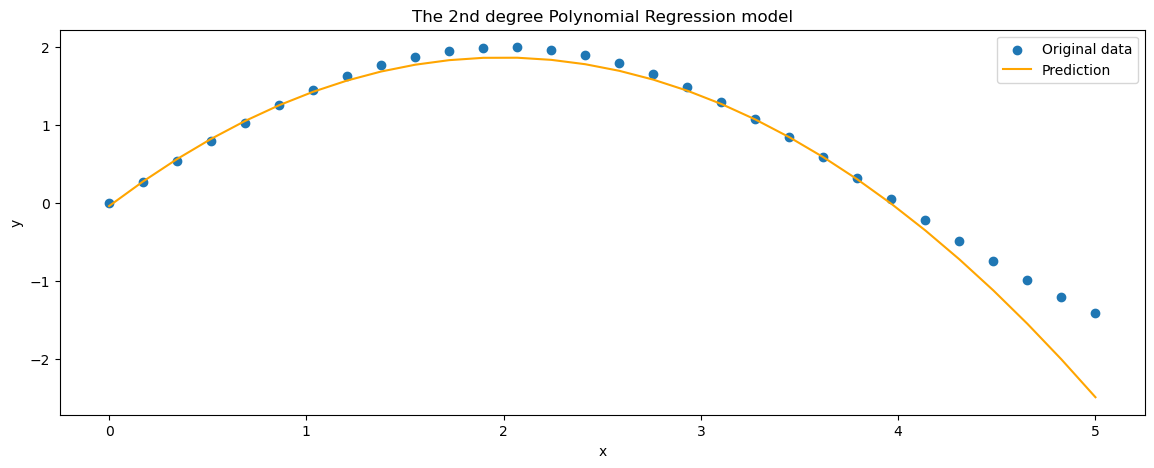

In [ ]:
plt.figure(figsize=(14, 5))

# plotting the results of the best degree polynomial regression model
plt.title(f'The {best_degree}nd degree Polynomial Regression model') 

plt.scatter(X_test, y_test, label='Original data')
plt.plot(X_test, y_pred_pr, color='orange', label='Prediction')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(loc='best')
plt.show()


As can be seen from the plot above, polynomial regression provides a good fit by matching the non-linear (quadratic) pattern of the data. Moreover, when compared to the linear regression model, polynomial regression provides much better model performance. The value of R² has increased, indicating a better fit of the data, while the value of RMSE has dropped, indicating greater accuracy in the model's predictions.



## Task 2

### Data processing
#### Loading the dataset

In [ ]:
import pandas as pd

# loading the data
df = pd.read_csv('pokemon_modified.csv')

#### Remove the 2 redundant features



In [ ]:
# finding the amount of unique values in each column of the dataset
unique_values = pd.DataFrame({'Feature': df.columns, 'Unique values': df.nunique()})

# sorting in descending order according to the amount of unique values in each column
sorted_unique_values = unique_values.sort_values(by='Unique values', ascending=False)

In [ ]:
sorted_unique_values.head(3)

,Feature,Unique values
name,name,801
classification,classification,588
weight_kg,weight_kg,421


In [ ]:
# finding and printing the proportion of unique values in the column 'name' (with the highest number of the unique values)
proportion_of_unique_names = df['name'].nunique() / df.shape[0]
proportion_of_unique_names

1.0



Based on the obtained proportion of unique values in the **'name'** column, every Pokemon has its own distinct name. Therefore, it can be concluded that this feature is redundant as it is not going to affect the prediction.



In [ ]:
# counting the missing values for each numerical feature column

numerical_features = df.select_dtypes(include=['int64', 'float64'])
missing_values = pd.DataFrame({'Numerical feature': numerical_features.columns, 'Missing values': numerical_features.isna().sum()}).reset_index(drop=True)

# sorting in descending order by the number of missing values in each column
sorted_missing_values = missing_values.sort_values(by='Missing values', ascending=False)

In [ ]:
sorted_missing_values.head(3)

,Numerical feature,Missing values
27,percentage_male,98
31,weight_kg,20
25,height_m,20


In [ ]:
# finding and printing the proportion of missing values in column with highest amount of missing values
proportion_of_missing_values = df['percentage_male'].isna().sum() / df.shape[0]
proportion_of_missing_values

0.12234706616729088



Approximately 12% of values in the 'persentage_male' column are missing , that is insufficient to assess the redundancy of the 'persentage_male' feature.


In [ ]:
# finding and displaying the list of all the categorical features in the dataset
categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns.to_list()

['classification', 'name', 'type1']

As can be seen, the dataset has 3 categorical features: 'classification', 'name' and 'type1'. Furthermore, as it was obtained above, the 'classification' feature column was the second candidate after column 'name' having the high amount of unique values.

In [ ]:
# finding and printing the proportion of unique values in the 'classification' column 
proportion_of_unique_classification = df['classification'].nunique() / df.shape[0]
proportion_of_unique_classification

0.7340823970037453

In [ ]:
print('The amount of unique values in \'classification\':', df['classification'].nunique())
print('The amount of all values:', df.shape[0])

The amount of unique values in 'classification': 588
The amount of all values: 801




As we can see, the 'classification' feature is a categorical feature with unique values in roughly 73% of cases. In other words, this feature has 588 distinct values out of 801. Further we need to one-hot encode this feature, which will result in a significant increase in the dimensionality of the dataset. Hence, the **'classification'** column should be dropped during this phase.




As a result, columns **'name'** and **'classification'** should be removed from the dataset.


In [ ]:
# removing 'name' and 'classification' columns
df = df.drop(['name', 'classification'], axis=1)

In [ ]:
# selecting predictors and target from the dataset
X = df.drop(['is_legendary'], axis=1)

y = df['is_legendary']

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [ ]:
from sklearn.model_selection import train_test_split

# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

Check if the dataset is balanced or not and comment on it

In [ ]:
# finding and printing the proportion of positive (legendary) class in dataset 
print('Proportion of positive (legendary) class in dataset:', sum(y == 1) / len(y))

Proportion of positive (legendary) class in dataset: 0.08739076154806492


In [ ]:
# finding and printing the proportion of negative (not legendary) class in dataset 
print('Proportion of negative (not legendary) class in dataset:', sum(y == 0) / len(y))

Proportion of negative (not legendary) class in dataset: 0.9126092384519351


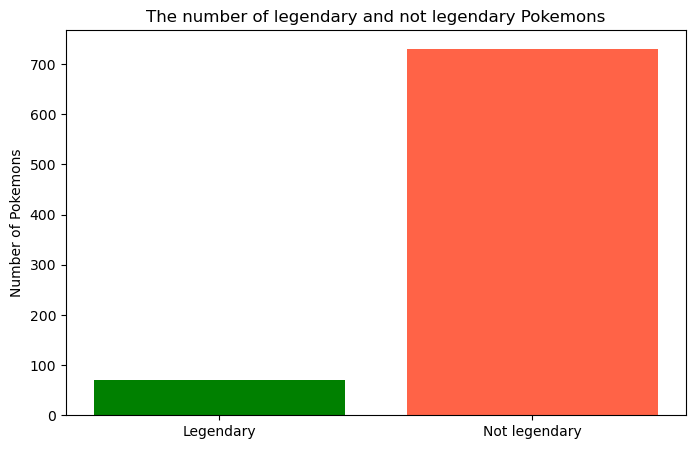

In [ ]:
import matplotlib.pyplot as plt


# creating the bar plot to visualize the number of observations in each target class
fig = plt.figure(figsize = (8, 5))

classes = ['Legendary', 'Not legendary']
data = [df[df['is_legendary'] == 1]['is_legendary'].count(), df[df['is_legendary'] == 0]['is_legendary'].count()]

plt.title('The number of legendary and not legendary Pokemons')
plt.ylabel('Number of Pokemons')
plt.bar(classes, data, color=['g', 'tomato'])
              
plt.show()




Based on the obtained proportions of legendary and non legendary Pokemons and the bar chart above, the target class has an uneven distribution of observations. Hence, **the dataset is imbalanced**.





#### Exploring the dataset and checking for missing values

In [ ]:
df.head(10)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.7,45,88.1,grass,65,65,45,6.9,1,0
1,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,1.0,60,88.1,grass,80,80,60,13.0,1,0
2,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,2.0,80,88.1,grass,122,120,80,100.0,1,0
3,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,0.6,39,88.1,fire,60,50,65,8.5,1,0
4,0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,1.1,58,88.1,fire,80,65,80,19.0,1,0
5,0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,...,1.7,78,88.1,fire,159,115,100,90.5,1,0
6,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,0.5,44,88.1,water,50,64,43,9.0,1,0
7,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,1.0,59,88.1,water,65,80,58,22.5,1,0
8,1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,...,1.6,79,88.1,water,135,115,78,85.5,1,0
9,1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,...,0.3,45,50.0,bug,20,20,45,2.9,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [ ]:
# finding the number of missing values in each column of the dataset
missing_values = pd.DataFrame({'Feature': df.columns, 'Missing values': df.isna().sum()}).reset_index(drop=True)

# displaying the sorted amounts of missing values in columns in descending order
sorted_missing_values = missing_values.sort_values(by='Missing values', ascending=False)
sorted_missing_values.head(4)

,Feature,Missing values
27,percentage_male,98
32,weight_kg,20
25,height_m,20
26,hp,0



As we can observe, the columns 'percentage_male', 'weight_kg', 'height_m' have missing values.




#### Impute the missing values

In [ ]:
from sklearn.impute import SimpleImputer

# definining and fitting the simple imputer on X_train
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)

# replacing missing values in the training and test data with the most frequent values for each column
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

#### Double check that there are no missing values

In [ ]:
# calculating the total number of missing values in the training data
X_train.isna().values.sum()

0

In [ ]:
# calculating the total number of missing values in the test data
X_test.isna().values.sum()

0



As we can see, there are no missing values in both training and test data.



#### Encode categorically

In [ ]:
# displaying the list of the categorical features in the dataset
df.select_dtypes(include=['object']).columns.tolist()

['type1']



As we can observe, the 'type1' is the categorical feature that should be encoded.



In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# one-hot-encode the categorical feature
def encoding(ds, feature_name, encoder):
    new_columns = pd.DataFrame(encoder.fit_transform(ds[feature_name]), columns=encoder.get_feature_names_out(feature_name))
    new_ds = pd.concat([ds, new_columns], axis=1)    
    new_ds.drop(feature_name, axis=1, inplace=True)
    return new_ds

In [ ]:
# defining one-hot-encoder
encoder = OneHotEncoder(sparse=False, drop='first')

# one-hot-encoding 'type1' column in both training and test data
x_train = encoding(X_train, ['type1'], encoder)
x_test = encoding(X_test, ['type1'], encoder)

#### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler

# definining and fitting the standard scaler on test data
scaler = StandardScaler()
scaler.fit(x_train)

# scaling features in both training and test data
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

x_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,type1_ghost,type1_grass,type1_ground,type1_ice,type1_normal,type1_poison,type1_psychic,type1_rock,type1_steel,type1_water
0,0.016434,-0.146072,0.113189,1.432760,-0.129599,1.259518,-1.317876,-1.141267,-0.004094,3.785345,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,2.456210
1,0.016434,2.040734,0.113189,-0.109656,-1.088485,-0.770939,-0.939651,-0.301231,1.742704,-0.690924,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,3.593472,-0.247709,-0.184189,-0.407131
2,0.016434,-0.146072,0.113189,-0.880864,-1.088485,-0.770939,1.329695,1.378840,-0.004094,-1.010658,...,-0.197386,3.138066,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
3,0.016434,-0.146072,0.113189,-0.109656,-0.129599,1.259518,-0.183202,-0.301231,-1.750892,-0.051457,...,-0.197386,-0.318668,-0.201619,-0.179605,2.627020,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
4,0.016434,-0.146072,0.113189,-1.652072,-0.129599,-0.094120,-0.183202,-0.301231,-0.004094,1.227477,...,-0.197386,-0.318668,4.959839,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.016434,-0.146072,0.113189,-0.109656,-0.129599,1.259518,-0.939651,-1.141267,-0.004094,1.227477,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,4.036991,-0.184189,-0.407131
636,0.016434,-0.146072,0.113189,1.432760,-0.129599,-0.094120,-0.939651,-0.301231,-0.004094,1.227477,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,2.456210
637,0.016434,-0.146072,0.113189,-0.880864,-1.088485,-0.770939,1.329695,1.378840,-0.004094,-1.010658,...,-0.197386,3.138066,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131
638,0.016434,-0.146072,0.113189,-1.652072,-0.129599,-0.770939,1.329695,1.378840,-0.004094,-0.051457,...,-0.197386,-0.318668,-0.201619,-0.179605,-0.380659,-0.197386,-0.278282,-0.247709,-0.184189,-0.407131


#### Correlation Matrix

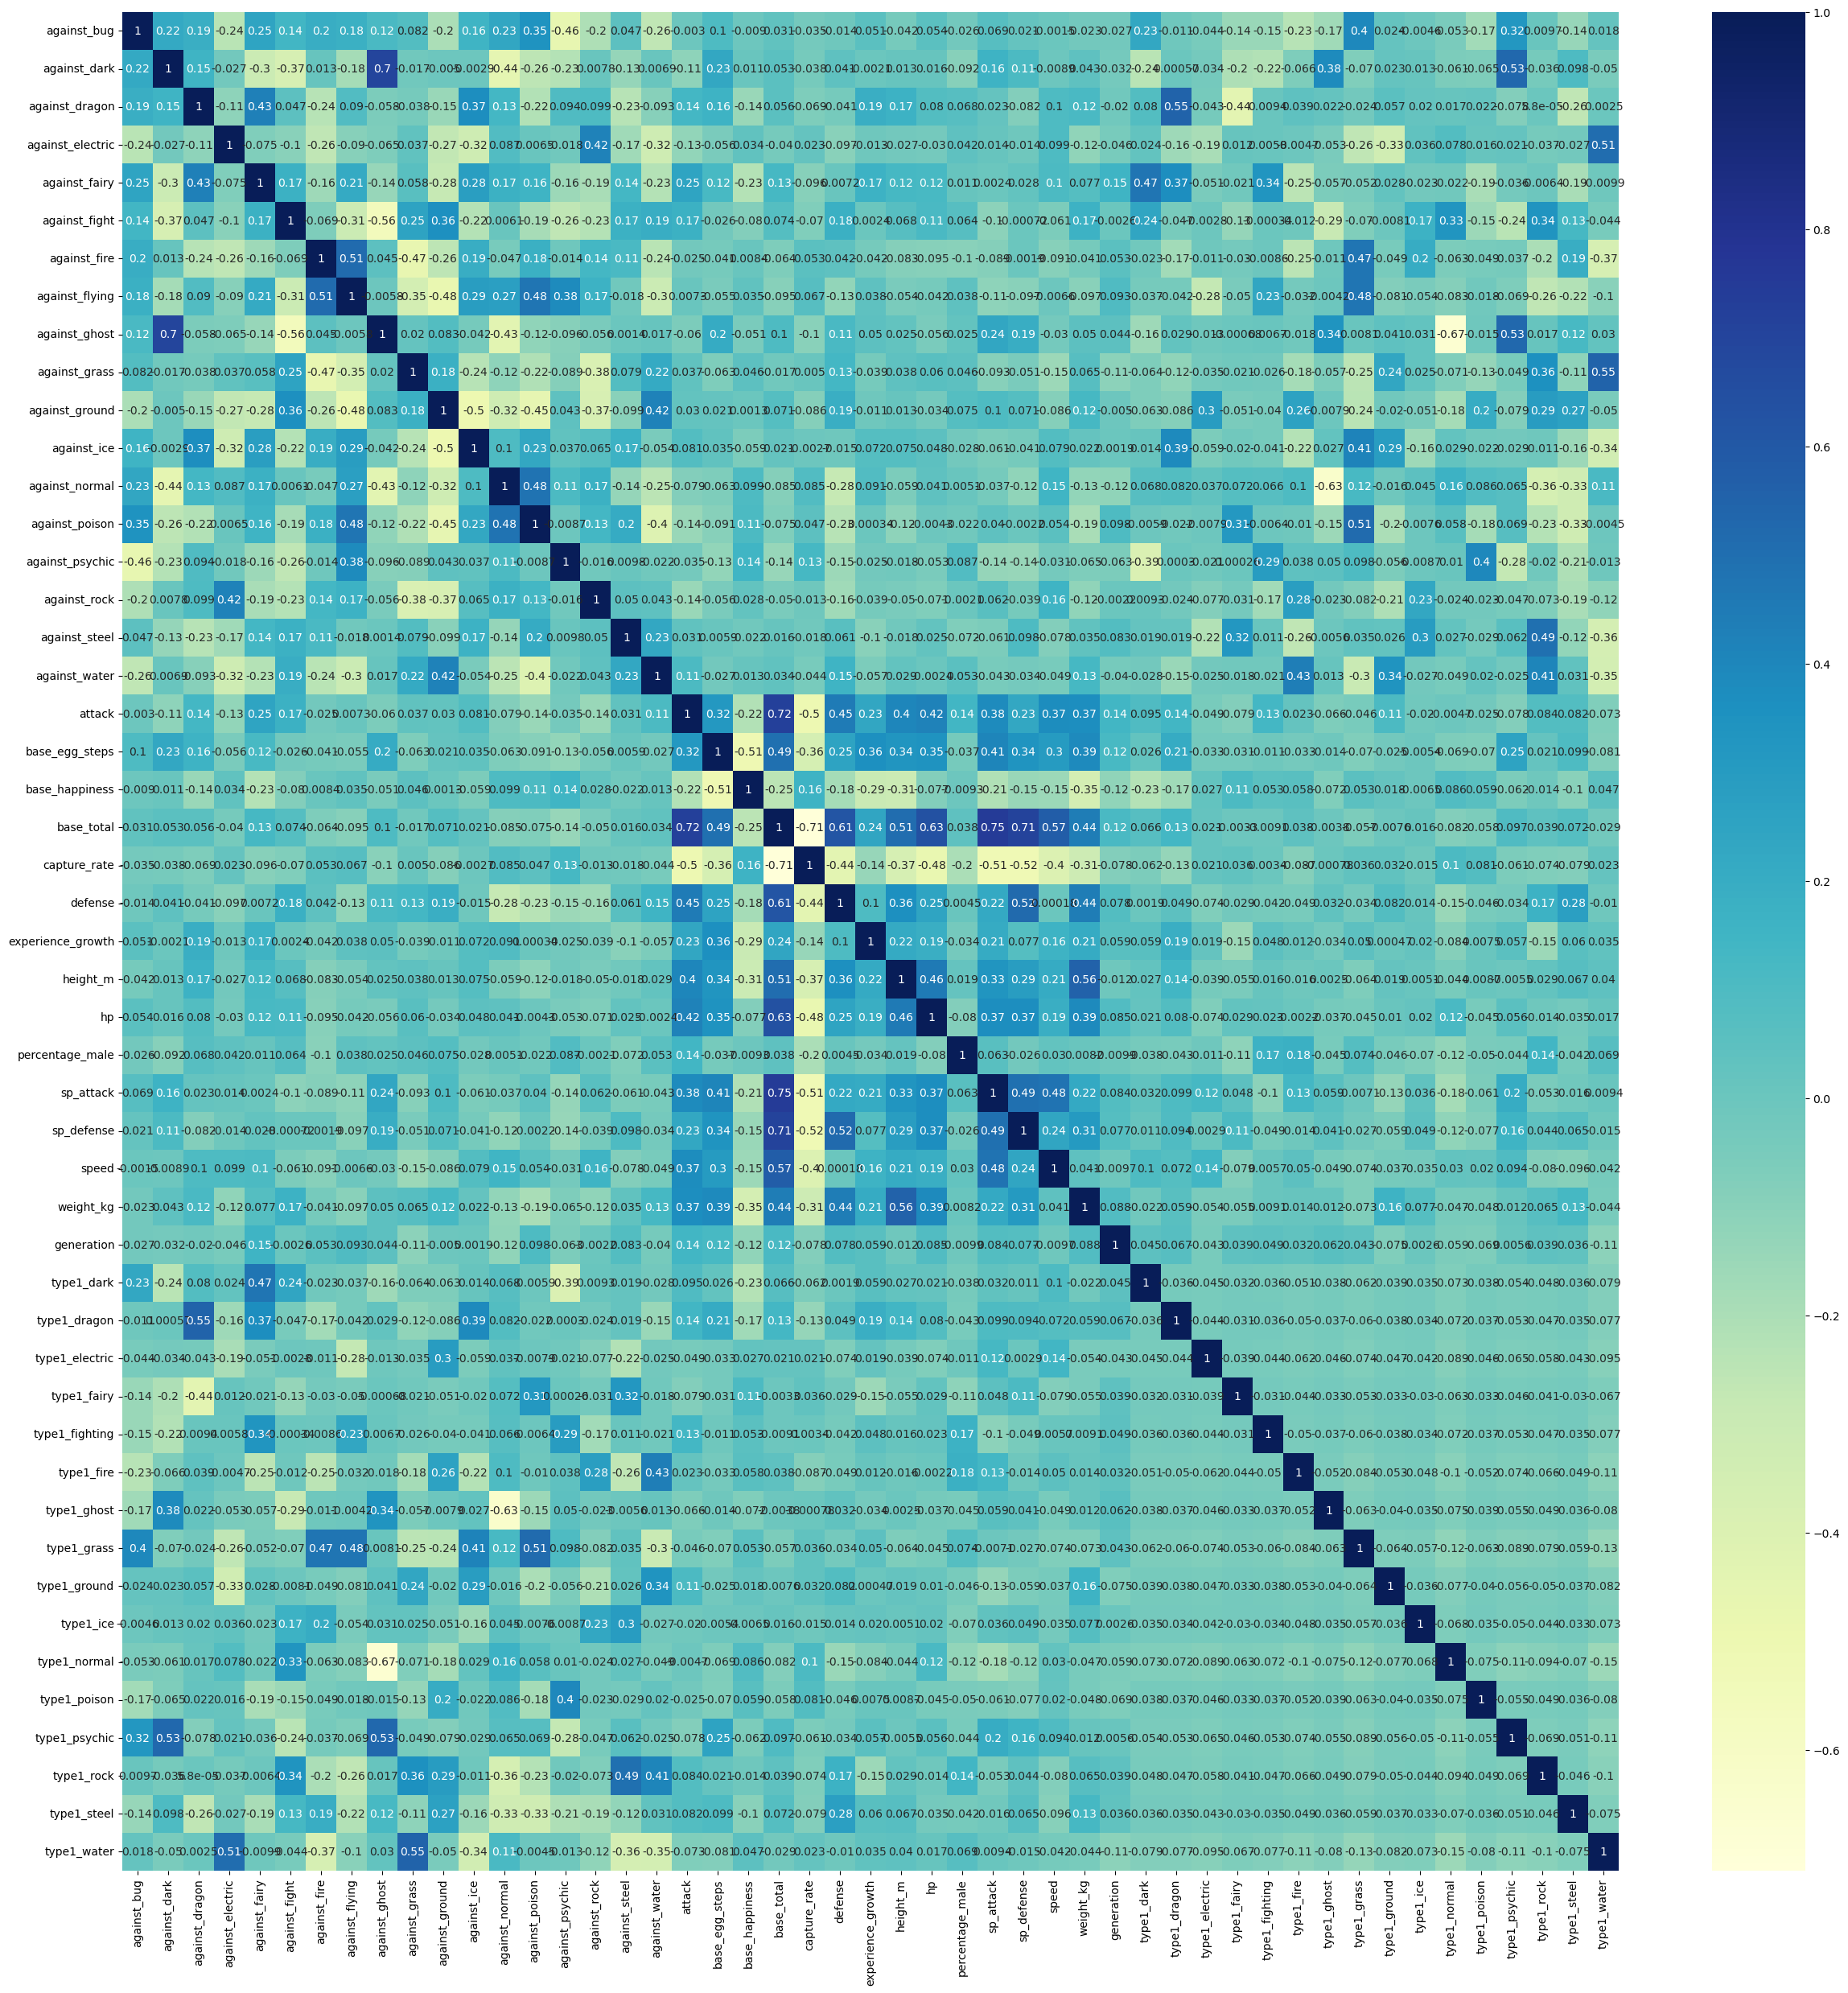

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating a heatmap and visualizing the correlation between the different features in the training data
plt.figure(figsize=(30, 30))

correlation_matrix = sns.heatmap(x_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
# calculating the absolute pairwise correlation between all the features
abs_corr = x_train.corr().abs()

# sorting the absolute correlations in descending order and pairwisely displaying the features with absolute correlation
sorted_correlations = pd.DataFrame(abs_corr.unstack().sort_values(kind="quicksort", ascending=False)).reset_index()
sorted_correlations[sorted_correlations.iloc[:, 0] != sorted_correlations.iloc[:, 1]]

,level_0,level_1,0
49,sp_attack,base_total,0.748548
50,base_total,sp_attack,0.748548
51,attack,base_total,0.722850
52,base_total,attack,0.722850
53,base_total,capture_rate,0.711196
...,...,...,...
2396,against_psychic,type1_fairy,0.000259
2397,defense,speed,0.000179
2398,speed,defense,0.000179
2399,against_dragon,type1_rock,0.000058


According to the obtained results, 'sp_attack' and 'base_total' are highly correlated with a coefficient of approximately 0.75. Similarly, 'attack' and 'base_total' are highly correlated with a coefficient of roughly 0.72, 'capture_rate' and 'base_total' - with a coefficient of 0.71.

Even though highly correlated features do not affect the model performance, they bring no new information to the dataset and lead to unreliable estimation of regression coefficients. So, avoiding highly correlated features is preferable in our case. Therefore, let's remove the 'base_total' feature from the both test and trainining sets.

In [ ]:
# removing 'base_total' column 
x_train = x_train.drop(['base_total'], axis=1)
x_test = x_test.drop(['base_total'], axis=1)

### Model fitting and Comparison

#### Tuning LR model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# caclulate and print metrics
def print_clf_metrics( y_actual, y_pred ):
    print('Accuracy:', accuracy_score(y_actual, y_pred))
    print('Precision:', precision_score(y_actual, y_pred))
    print('Recall:', recall_score(y_actual, y_pred))
    print('F1-score:', f1_score(y_actual, y_pred))

max_iter=1000 in LR constructor

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


# finding the best hyper-parameters for logistic regression model
c = np.logspace(-3,3,7)
parameters = [
    {'penalty': ['l2'], 'C': c, 'solver': ['newton-cg', 'lbfgs']},
    {'penalty': ['l1', 'l2'], 'C': c, 'solver': ['liblinear']}
]
lr = LogisticRegression(max_iter=1000)
gs_clf = GridSearchCV(lr, parameters)

gs_clf.fit(x_train, y_train)

# printing the best hyper-parameters and accuracy 
print('Tuned Hyperparameters :', gs_clf.best_params_)
print('Accuracy :', gs_clf.best_score_)

Tuned Hyperparameters : {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [ ]:
# constructing the logistic regression model with the best parameters
lr_clf = LogisticRegression(**gs_clf.best_params_, max_iter=1000)

In [ ]:
# train the logistic regression model on the training data
lr_clf.fit(x_train, y_train)

# make predictions on the test data
y_pred_lr = lr_clf.predict(x_test)

In [ ]:
# evaluating the performance of logistic regression with the best parameters
print_clf_metrics(y_test, y_pred_lr)

Accuracy: 0.9937888198757764
Precision: 0.9333333333333333
Recall: 1.0
F1-score: 0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [ ]:
# finding feature importance absolute coefficient for all features
feature_importance = pd.DataFrame({'Feature name':lr_clf.feature_names_in_, 'Absolute coefficient': np.abs(lr_clf.coef_).flatten()})

# sorting the feature importances in descending order by absolute coefficient of the feature
sorted_feature_importance = feature_importance.sort_values('Absolute coefficient', ascending=False)

In [ ]:
# displaying the top 5 most influencing features
sorted_feature_importance.head(5)

,Feature name,Absolute coefficient
42,type1_normal,5.574273
19,base_egg_steps,4.357221
21,capture_rate,3.112637
25,hp,2.340872
29,speed,2.298066


In [ ]:
# sorting the feature importances in ascending order by absolute coefficient of the feature
inv_sorted_feature_importance = feature_importance.sort_values('Absolute coefficient', ascending=True)

In [ ]:
# displaying the top 5 most ignored features
inv_sorted_feature_importance.head(5)

,Feature name,Absolute coefficient
36,type1_fighting,0.012317
9,against_grass,0.024344
39,type1_grass,0.037604
35,type1_fairy,0.047100
40,type1_ground,0.161288


#### Tuning KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# finding the best hyper-parameters for KNN model
k = np.arange(1, 15)
param_grid = {'n_neighbors': k, 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine']}
kn_clf = KNeighborsClassifier()
grid_search_clf = GridSearchCV(kn_clf, param_grid)

grid_search_clf.fit(x_train, y_train)

# printing the best hyper-parameters and accuracy 
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :",grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 4, 'weights': 'distance'}
Accuracy : 0.9515625


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [ ]:
# constructing the KNN model with the best parameters
knn = KNeighborsClassifier(**grid_search_clf.best_params_)

In [ ]:
# train the KNN model on the training data
knn.fit(x_train, y_train)

# make predictions on the test data
y_pred_knn = knn.predict(x_test)

In [ ]:
# evaluating the performance of the KNN model with best parameters
print_clf_metrics(y_test, y_pred_knn)

Accuracy: 0.9813664596273292
Precision: 1.0
Recall: 0.7857142857142857
F1-score: 0.88


#### Fitting GNB to the data and evaluating on the test dataset

In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()

# fit a Gaussian Naive-Bayes model to the training set
gauss_nb.fit(x_train, y_train)

# make predictions on the test set
y_pred_nb = gauss_nb.predict(x_test)

In [ ]:
# evaluating the performance of the Gaussian Naive-Bayes model
print_clf_metrics(y_test, y_pred_nb)

Accuracy: 0.9316770186335404
Precision: 0.56
Recall: 1.0
F1-score: 0.717948717948718


When assessing the performance of a model on an imbalanced dataset, accuracy is not a reliable metric, as it does not take into account the dataset imbalance. The F1-score, however, considers both false positives and false negatives, resulting in a score that represents the model accuracy considering the dataset imbalance. Furthermore, the F1-score provides a balance between precision and recall. Considering all the above, the **F1-score** is the most appropriate metric for this task. 




#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.

In [ ]:
# displaying the comparison between all 3 classifiers in terms of metrics 
accuracy_scores = []
precision_scores =[]
recall_scores = []
f1_scores = []
predictions = [y_pred_lr, y_pred_knn, y_pred_nb]

for prediction in predictions:
    accuracy_scores.append(accuracy_score(y_test, prediction))
    precision_scores.append(precision_score(y_test, prediction))
    recall_scores.append(recall_score(y_test, prediction))
    f1_scores.append(f1_score(y_test, prediction))


comparison = pd.DataFrame({'Classifier': ['Logistic Regression', 'KNN', 'Gaussian NB'], 'Accuracy': accuracy_scores, 'Precision': precision_scores,'Recall': recall_scores, 'F1-score': f1_scores})
comparison

,Classifier,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.993789,0.933333,1.000000,0.965517
1,KNN,0.981366,1.000000,0.785714,0.880000
2,Gaussian NB,0.931677,0.560000,1.000000,0.717949



As can be seen from the table above, **Logistic Regression classifier** provides the best performance based on the value of F1-score. Its F1-score of approximately 0.97 is the highest among other classifiers, which indicates that it is the most accurate model classifier for this task. 



## Bonus Task

#### Loading the Dataset

In [ ]:
import pandas as pd

# loading the datasets
train_data = pd.read_csv('bonus_train.csv')
test_data = pd.read_csv('bonus_test.csv')

In [ ]:
# splitting the data into training and test datasets
X_train = train_data.drop('target', axis=1)
y_train = train_data['target']

X_test = test_data.drop('target', axis=1)
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

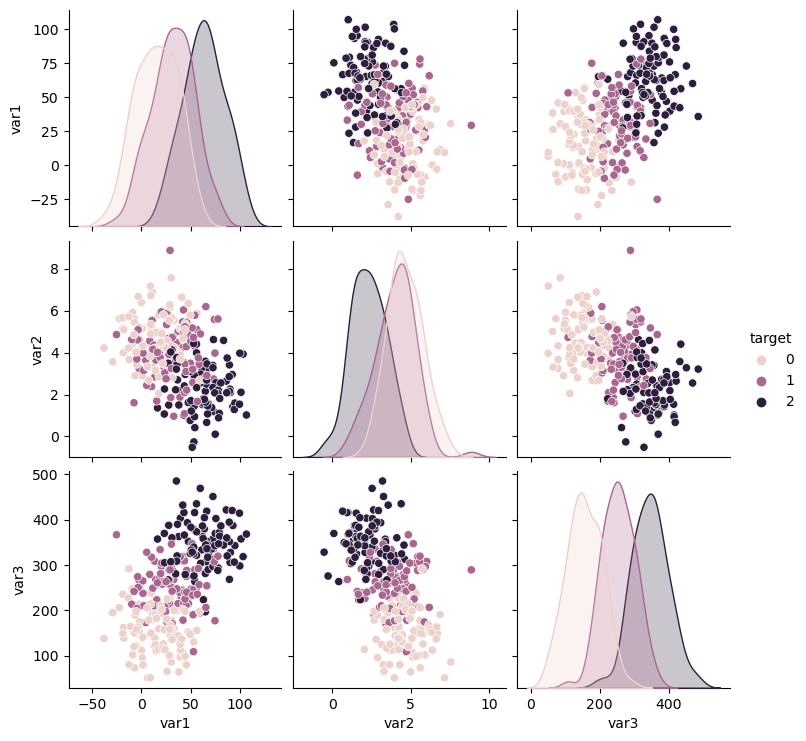

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# plotting the training dataset 
sns.pairplot(train_data, hue='target', kind='scatter')
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [ ]:
from sklearn.linear_model import LogisticRegression

# creating the logistic regression model using 'ovr' (one-vs-all) technique
multi_lr = LogisticRegression(multi_class='ovr')

# fitting the model to the training data
multi_lr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [ ]:
# evaluating the performance of the logistic regression model with the 'ovr' approach
print('Mean accuracy on test data:', multi_lr.score(X_test, y_test))

Mean accuracy on test data: 0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [ ]:
# creating the logistic regression model using 'multinomial' (one-vs-one) technique
multi_lr = LogisticRegression(multi_class='multinomial', max_iter=1000)

# fitting the model to the training data
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# evaluating the performance of the logistic regression model with the 'multinomial' approach
print('Mean accuracy on test data:', multi_lr.score(X_test, y_test))

Mean accuracy on test data: 0.9


#### Using gridsearch to tune the C value and multi class

In [ ]:
# finding the best hyper-parameters for the logistic regression model
params = {'C': np.logspace(-10, 10, 7), 'multi_class': ['multinomial', 'ovr']}

multi_lr = LogisticRegression(max_iter=1000)
grid_search_clf = GridSearchCV(multi_lr, params)

grid_search_clf.fit(X_train, y_train)

# printing the best hyper-parameters and accuracy 
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 2154.4346900318865, 'multi_class': 'multinomial'}
Accuracy : 0.825925925925926


#### Create LR with the best params

In [ ]:
# creating the logistic regression model with the best parameters
multi_lr = LogisticRegression(**grid_search_clf.best_params_, max_iter=1000)

#### Visualize the decision boundaries

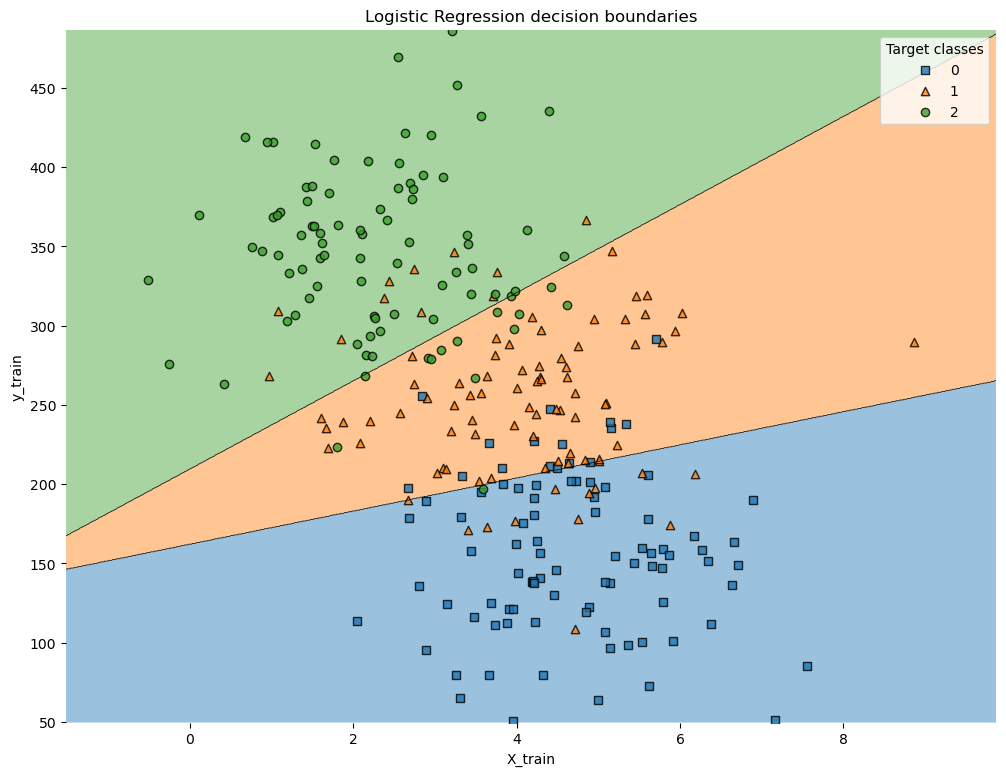

In [ ]:
from mlxtend.plotting import plot_decision_regions

# leaving 2 features in X_train
X = np.array(X_train[['var2', 'var3']])
y = np.array(y_train)

# fitting the model on 2 features of training data
multi_lr.fit(X, y)

plt.figure(figsize=(12, 9))

plot_decision_regions(X, y, clf=multi_lr)

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title('Logistic Regression decision boundaries')

plt.legend(title='Target classes', loc='best')

plt.show()

As can be seen from the decision boundaries visualization above, the obtained model performs quite well as it is able to classify most of the data points correctly. However, the dataset is a bit noisy since some of the data points (near the boundaries) are misclassified. In this case, it might be beneficial to use regularization techniques to reduce the noise in the dataset improving the model's accuracy. Additionally, it is also important to consider the whole dataset and visualize it in higher dimensions to get a better understanding of the decision boundary and how it is formed. 
